In [1]:
#Download and import dataset from this link https://www.kaggle.com/datasets/yasserh/twitter-tweets-sentiment-dataset

#1. Importing dataset into dataframe(you can import dataset with )
import pandas as pd

dataset = pd.read_csv(r'C:/Users/Anes/Downloads/Tweets.csv')

In [3]:
#2. Print info and first 5 rows of dataset - what we can read from the output?

print(dataset.info())
dataset.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27481 entries, 0 to 27480
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   textID         27481 non-null  object
 1   text           27480 non-null  object
 2   selected_text  27480 non-null  object
 3   sentiment      27481 non-null  object
dtypes: object(4)
memory usage: 858.9+ KB
None


,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


In [4]:
#Print column 'text'

print(dataset['text'])

0                      I`d have responded, if I were going
1            Sooo SAD I will miss you here in San Diego!!!
2                                my boss is bullying me...
3                           what interview! leave me alone
4         Sons of ****, why couldn`t they put them on t...
                               ...                        
27476     wish we could come see u on Denver  husband l...
27477     I`ve wondered about rake to.  The client has ...
27478     Yay good for both of you. Enjoy the break - y...
27479                           But it was worth it  ****.
27480       All this flirting going on - The ATG smiles...
Name: text, Length: 27481, dtype: object


In [5]:
#3. Delete/Drop columns textID and selected_text since it will not be valuable for the prediction

dataset.drop( 'textID', axis=1, inplace=True)
dataset.drop( 'selected_text', axis=1, inplace=True)
dataset.head()

,text,sentiment
0,"I`d have responded, if I were going",neutral
1,Sooo SAD I will miss you here in San Diego!!!,negative
2,my boss is bullying me...,negative
3,what interview! leave me alone,negative
4,"Sons of ****, why couldn`t they put them on t...",negative


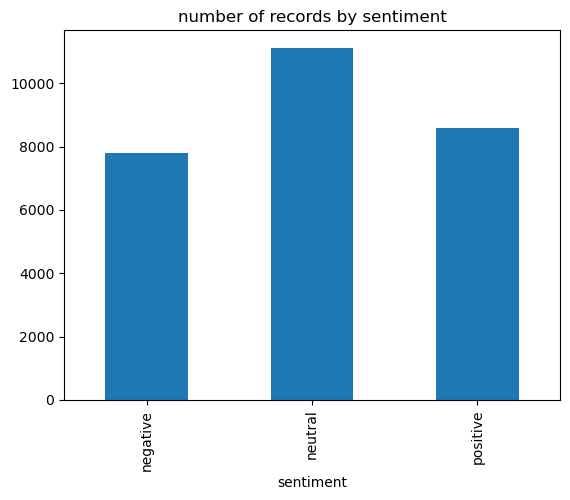

In [6]:
#4. Plot a graf to prepresent a distribution of sentiments over records

plot = dataset.groupby("sentiment").size().plot(kind="bar", title="number of records by sentiment")

#what we can conclude? how many records are there for each sentiment? is this good dataset for prediction?

In [7]:
#5. See if you have any null values in your dataset, this can cause problem in accuracy and later in prediction
# If there are any null, we need to get rid of it by deleting it (if there are few) or replacing it

dataset.isnull().sum()

text         1
sentiment    0
dtype: int64

In [8]:
#6. Drop null values with function dropna(), we know they are in columns 'text'

dataset.dropna(subset=['text'], inplace=True)

dataset.isnull().sum()

text         0
sentiment    0
dtype: int64

In [9]:
#7. Creating function to cleaning a text data with regex from punctations, hyperlinks, non-alphabet characters

import re

def cleanTxt(text):
    text = re.sub(r'@\w+|#\w+', '', text) #Removing @mentions
    text = re.sub('RT[\s]+', '', text) #Removing RT
    text = re.sub('/^(?:https?:\/\/)?(?:[^@\n]+@)?(?:www\.)?([^:\/\n?]+)/img', '', text) #Removing hyperlink
    text = re.sub('[^a-zA-Z]', '', text) # remove punctuation
    text = text.lower() #convert to lowercase letters
    #text = re.sub(r'([a-z])\1+', r'\1', text) #remove repeating letters
    return text

In [10]:
#8. Creating a function to tokenize text, clean it from with regex and from stop words

import nltk
nltk.download('punkt')
nltk.download('stopwords')

stopwords = nltk.corpus.stopwords.words('english')

def tokenization_and_cleaning(text):

  #tokenize sentence
  word_tokens = nltk.word_tokenize(text)

  #clean words in sentence
  clean_word_tokens=[]
  for w in word_tokens:
    clean_word_tokens.append(cleanTxt(w))

  #remove stop words
  clean_word_tokens_from_stopwords = [w for w in clean_word_tokens if w.lower() not in stopwords and w.isalpha()]

  return(" ".join(clean_word_tokens_from_stopwords))

[nltk_data] Downloading package punkt to C:\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
#Example of one text being transformed from original form to cleaned

tokenization_and_cleaning('I`d have responded, if I were going')

'responded going'

In [12]:
#9. Apply this process on all tweets - rows in dataset, we have created a new column for cleaned text 'text_cleaned'


dataset['text_cleaned'] = [tokenization_and_cleaning(tweet) for tweet in dataset['text']]

In [13]:
#Now our dataset looks like this

dataset

,text,sentiment,text_cleaned
0,"I`d have responded, if I were going",neutral,responded going
1,Sooo SAD I will miss you here in San Diego!!!,negative,sooo sad miss san diego
2,my boss is bullying me...,negative,boss bullying
3,what interview! leave me alone,negative,interview leave alone
4,"Sons of ****, why couldn`t they put them on t...",negative,sons put releases already bought
...,...,...,...
27476,wish we could come see u on Denver husband l...,negative,wish could come see u denver husband lost job ...
27477,I`ve wondered about rake to. The client has ...,negative,wondered rake client made clear net force devs...
27478,Yay good for both of you. Enjoy the break - y...,positive,yay good enjoy break probably need hectic week...
27479,But it was worth it ****.,positive,worth


In [14]:
#10. Lets now apply Stemmer and see some examples how it works

porter = nltk.PorterStemmer()
lancaster = nltk.LancasterStemmer()

print(porter.stem('responded going'))
print(lancaster.stem('responded going'))

responded go
responded going


In [15]:
#11. Lets now apply Lemmatier and see some examples how it works

nltk.download('wordnet')

lemma = nltk.WordNetLemmatizer()
print(lemma.lemmatize('responded going'))

#Since from this tweet we can see that PorterStemmer worked the best we can use it from now on
#This does not mean the prediction will be better with PorterStemmer
#We can apply all three examples and compare accuracy at the end of the prediction to get better image what works the best

[nltk_data] Downloading package wordnet to C:\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


responded going


In [16]:
#12. Apply PorterStemmer on all tweets - rows in dataset

dataset['text_cleaned'] = [porter.stem(tweet) for tweet in dataset['text_cleaned']]

In [17]:
dataset['text_cleaned'].head()

0                        responded go
1             sooo sad miss san diego
2                          boss bulli
3                interview leave alon
4    sons put releases already bought
Name: text_cleaned, dtype: object

In [18]:
#Now our dataset looks like this

dataset

,text,sentiment,text_cleaned
0,"I`d have responded, if I were going",neutral,responded go
1,Sooo SAD I will miss you here in San Diego!!!,negative,sooo sad miss san diego
2,my boss is bullying me...,negative,boss bulli
3,what interview! leave me alone,negative,interview leave alon
4,"Sons of ****, why couldn`t they put them on t...",negative,sons put releases already bought
...,...,...,...
27476,wish we could come see u on Denver husband l...,negative,wish could come see u denver husband lost job ...
27477,I`ve wondered about rake to. The client has ...,negative,wondered rake client made clear net force devs...
27478,Yay good for both of you. Enjoy the break - y...,positive,yay good enjoy break probably need hectic week...
27479,But it was worth it ****.,positive,worth


['responded', 'go', 'http', 'wwwdothebouncycomsmf', 'shameless', 'plugging', 'best', 'rangers', 'forum', 'earth', 'soooo', 'high', 'much', 'love', 'hopeful', 'reckon', 'chances', 'minimal', 'p', 'never', 'gon', 'na', 'get', 'cake', 'stuff', 'test', 'test', 'lg', 'env', 'he', 'oh', 'marly', 'sorry', 'hope', 'find', 'soon', 'cleaning', 'house', 'family', 'comming', 'later', 'today', 'got', 'ta', 'restart', 'computer', 'thought', 'win', 'supposed', 'put', 'end', 'constant', 'rebooti', 'see', 'wat', 'mean', 'bout', 'follw', 'friidays', 'called', 'lose', 'fllowers', 'friday', 'smh', 'ahhh', 'slept', 'game', 'gon', 'na', 'try', 'best', 'watch', 'tomorrow', 'though', 'hope', 'play', 'armi', 'thats', 'end', 'tears', 'fears', 'vs', 'eric', 'prydz', 'dj', 'hero', 'http', 'bitlyhpbg', 'case', 'wonder', 'really', 'busy', 'today', 'coming', 'adding', 'tons', 'new', 'blogs', 'updates', 'stay', 'tun', 'car', 'happy', 'big', 'big', 'dent', 'boot', 'hoping', 'theyre', 'going', 'write', 'crossing', 'fin

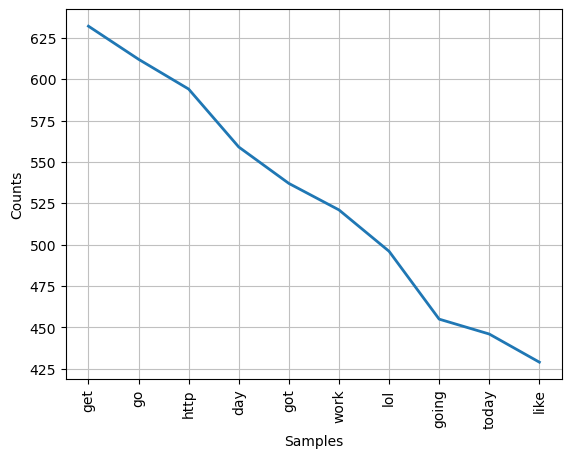

<Axes: xlabel='Samples', ylabel='Counts'>

In [19]:
# Get data about most used words in neutral class

all_tweets_neutral = []

for tweet in dataset[dataset['sentiment']=='neutral']['text_cleaned']:
  for word in nltk.word_tokenize(tweet):
    all_tweets_neutral.append(word)

print(all_tweets_neutral)

nltk.FreqDist(all_tweets_neutral).plot(10)

['sooo', 'sad', 'miss', 'san', 'diego', 'boss', 'bulli', 'interview', 'leave', 'alon', 'sons', 'put', 'releases', 'already', 'bought', 'sharpie', 'running', 'dangerously', 'low', 'ink', 'want', 'go', 'music', 'tonight', 'lost', 'voic', 'uh', 'oh', 'sunburn', 'ok', 'trying', 'plot', 'alternatives', 'speak', 'sigh', 'sick', 'past', 'days', 'thus', 'hair', 'looks', 'wierd', 'didnt', 'hat', 'would', 'look', 'http', 'tinyurlcommnfkw', 'back', 'home', 'gon', 'na', 'miss', 'every', 'on', 'sorri', 'way', 'malaysia', 'internet', 'access', 'twit', 'went', 'sleep', 'power', 'cut', 'noida', 'power', 'back', 'work', 'consolation', 'got', 'bmi', 'tested', 'hahaha', 'says', 'obesed', 'well', 'much', 'unhappy', 'minut', 'born', 'raised', 'nyc', 'living', 'texas', 'past', 'years', 'still', 'miss', 'ni', 'soooooo', 'sleeeeepy', 'last', 'day', 'school', 'today', 'sniffl', 'egh', 'blah', 'boooooooooooo', 'dunno', 'wan', 'na', 'go', 'work', 'hangovers', 'suckkkkkk', 'im', 'drunk', 'mess', 'donbt', 'like', 

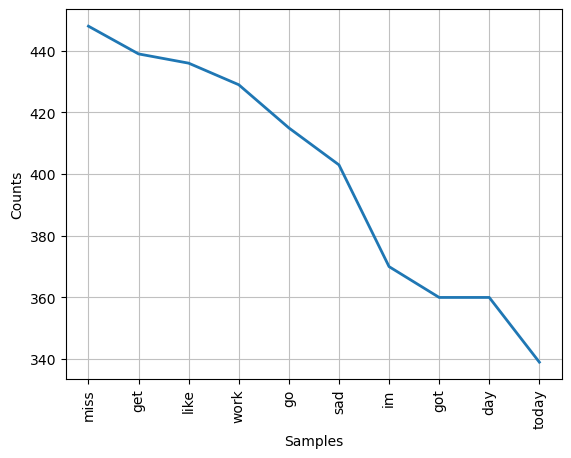

<Axes: xlabel='Samples', ylabel='Counts'>

In [20]:
# Get data about most used words in neutral class

all_tweets_negative = []

for tweet in dataset[dataset['sentiment']=='negative']['text_cleaned']:
  for word in nltk.word_tokenize(tweet):
    all_tweets_negative.append(word)

print(all_tweets_negative)

nltk.FreqDist(all_tweets_negative).plot(10)

['feedings', 'baby', 'fun', 'smiles', 'coo', 'journey', 'wow', 'u', 'became', 'cooler', 'hehe', 'poss', 'really', 'really', 'like', 'song', 'love', 'story', 'taylor', 'swift', 'playing', 'ghost', 'online', 'really', 'interesting', 'new', 'updates', 'kirin', 'pet', 'metamorph', 'third', 'job', 'wait', 'dragon', 'pet', 'free', 'fillin', 'app', 'ipod', 'fun', 'im', 'addict', 'juss', 'came', 'backk', 'berkeleyy', 'omg', 'madd', 'fun', 'havent', 'minute', 'whassqoodd', 'going', 'home', 'seen', 'new', 'twitter', 'design', 'quite', 'heavenli', 'hope', 'unni', 'make', 'audition', 'fighting', 'dahye', 'unni', 'funny', 'cute', 'kid', 'little', 'happy', 'wine', 'jeje', 'ok', 'sm', 'free', 'time', 'cares', 'jaja', 'love', 'day', 'im', 'avid', 'fan', 'magazine', 'love', 'magazin', 'love', 'available', 'pm', 'dear', 'would', 'love', 'help', 'convert', 'vid', 'romance', 'zero', 'funni', 'better', 'way', 'spoil', 'mum', 'let', 'kick', 'back', 'relax', 'nice', 'meal', 'bottle', 'favorite', 'wine', 'win

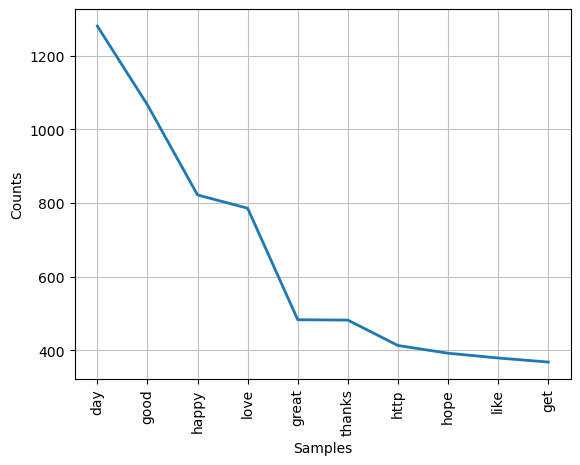

<Axes: xlabel='Samples', ylabel='Counts'>

In [21]:
# Get data about most used words in positive class

all_tweets_positive = []

for tweet in dataset[dataset['sentiment']=='positive']['text_cleaned']:
  for word in nltk.word_tokenize(tweet):
    all_tweets_positive.append(word)

print(all_tweets_positive)

nltk.FreqDist(all_tweets_positive).plot(10)

In [22]:
#13. We will now slowly start to transform text values into numberic. First we will transform sentiments - class label into a numeric.
# 1 will be for  neutral class, 2 for negative class, 3 for positive class

dataset['sentiment'].replace(['neutral', 'negative', 'positive'], [1, 2, 3], inplace=True)

In [23]:
#Now our dataset looks like this

dataset

,text,sentiment,text_cleaned
0,"I`d have responded, if I were going",1,responded go
1,Sooo SAD I will miss you here in San Diego!!!,2,sooo sad miss san diego
2,my boss is bullying me...,2,boss bulli
3,what interview! leave me alone,2,interview leave alon
4,"Sons of ****, why couldn`t they put them on t...",2,sons put releases already bought
...,...,...,...
27476,wish we could come see u on Denver husband l...,2,wish could come see u denver husband lost job ...
27477,I`ve wondered about rake to. The client has ...,2,wondered rake client made clear net force devs...
27478,Yay good for both of you. Enjoy the break - y...,3,yay good enjoy break probably need hectic week...
27479,But it was worth it ****.,3,worth


In [24]:
#14. Take the features - 'text_cleaned' column as X variable and class - 'sentiment' column as Y variable

X = dataset['text_cleaned'] #this is our feature in dataset - features
y = dataset['sentiment'] #this is our class label in dataset - label

print(X)
print(y)

0                                             responded go
1                                  sooo sad miss san diego
2                                               boss bulli
3                                     interview leave alon
4                         sons put releases already bought
                               ...                        
27476    wish could come see u denver husband lost job ...
27477    wondered rake client made clear net force devs...
27478    yay good enjoy break probably need hectic week...
27479                                                worth
27480                    flirting going atg smiles yay hug
Name: text_cleaned, Length: 27480, dtype: object
0        1
1        2
2        2
3        2
4        2
        ..
27476    2
27477    2
27478    3
27479    3
27480    1
Name: sentiment, Length: 27480, dtype: int64


In [25]:
#15. Now we need to transform text features into numberic valaues such that we will count occurance of each word in whole dataset for each row

from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

tf = CountVectorizer()
x_tf = tf.fit_transform(X)

# I have created dataframe just for visualization purposes, to show how our dataset looks now it has no value to the prediction

new_dataset = pd.DataFrame(x_tf.toarray(), columns=tf.get_feature_names_out())
new_dataset

,aa,aaa,aaaa,aaaaaaaaaaa,aaaaaaaaaahhhhhhhh,aaaaaaaaaamazing,aaaaaaaafternoon,aaaaaaaahhhhhhhh,aaaaaah,aaaaaahhhhhhhh,...,zumba,zune,zwarte,zwitschert,zxt,zyrtec,zzzz,zzzzy,zzzzzzz,zzzzzzzzzzzzzzz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27475,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27476,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27477,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27478,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
#15. Import library from sklearn to divide dataset into train and test sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_tf, y, test_size = 0.3, stratify = y)

In [27]:
#16. Import RandomForestClassifier from sklearn library and train model with train sets

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

In [28]:
#Evaluate the accuracy of the model with test datasets

model.score(X_test, y_test)

0.6780688985929161

In [29]:
#With Confusion Matrix visualize the predicted values, which are predicted correct which not

from sklearn.metrics import multilabel_confusion_matrix

y_pred = model.predict(X_test)
cf_matrix = multilabel_confusion_matrix(y_test, y_pred, labels=[1,2,3])
print(cf_matrix)

[[[3552 1357]
  [ 956 2379]]

 [[5347  563]
  [ 987 1347]]

 [[4935  734]
  [ 711 1864]]]


<Axes: >

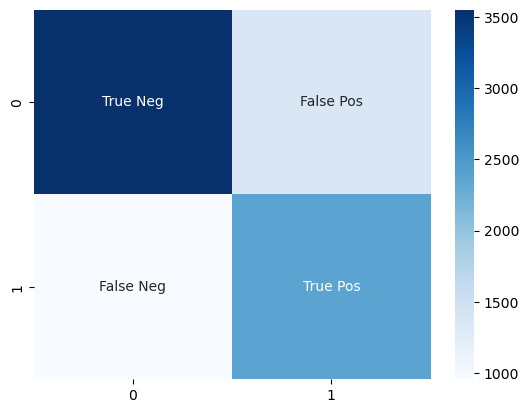

In [30]:
import seaborn as sns
import numpy as np

#Confusion Matrix for first class - neutral

labels = ['True Neg','False Pos','False Neg','True Pos']
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix[0], annot=labels, fmt='', cmap='Blues')

<Axes: >

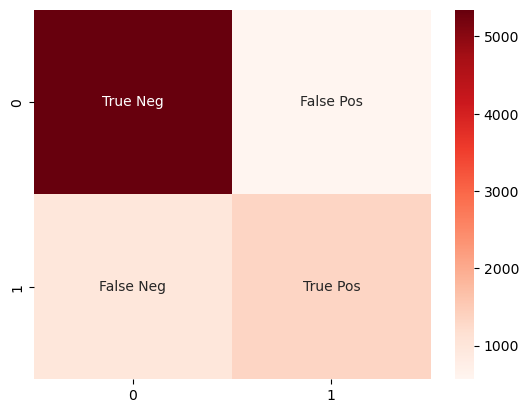

In [31]:
#Confusion Matrix for second class - negative

labels = ['True Neg','False Pos','False Neg','True Pos']
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix[1], annot=labels, fmt='', cmap='Reds')

<Axes: >

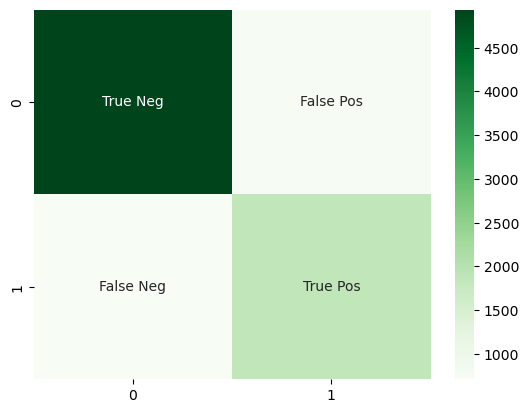

In [32]:
#Confusion Matrix for third class - positive

labels = ['True Neg','False Pos','False Neg','True Pos']
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix[2], annot=labels, fmt='', cmap='Greens')